In [1]:
import glob
import pickle

import matplotlib.pyplot as plt
import numpy as np

In [2]:
paths = glob.glob("experiments/20210930*/log.pkl")
[p.split("/")[1] for p in paths]

['20210930112054_foobar',
 '20210930112350_foobar',
 '20210930112418_foobar',
 '20210930112455_foobar',
 '20210930112528_foobar',
 '20210930115002_foobar',
 '20210930121425_SDR',
 '20210930124004_foobar',
 '20210930140148_willi_wills_wissen',
 '20210930140756_willi_wills_wissen',
 '20210930142130_gross_incoming',
 '20210930145746_seq_agent_002',
 '20210930152651_soft_pine_first_try',
 '20210930153503_vibrant_dawn_first_try',
 '20210930154332_winter_gorge_first_try',
 '20210930155202_onestep001_firsttry',
 '20210930155235_onestep001_firsttry',
 '20210930155329_onestep001_firsttry',
 '20210930155423_onestep002_firsttry',
 '20210930155550_onestep002_firsttry',
 '20210930155651_onestep002_firsttry',
 '20210930155830_onesteo003_firsttry',
 '20210930155901_onesteo003_firsttry',
 '20210930155928_onesteo003_firsttry',
 '20210930160027_ppo001_firsttry',
 '20210930160103_ppo001_firsttry',
 '20210930160211_ppo001_firsttry',
 '20210930160231_ppo001_firsttry',
 '20210930160322_bayes_firsttry',
 '20

## First Try Results

In [3]:
objectives = []
models = []
initials = []
final_beams = []
final_actuators = []

In [4]:
# Sequential
names = [
    "20210930142130_gross_incoming",
    "20210930145746_seq_agent_002_rebinned",
    "20210930152651_soft_pine_first_try",
    "20210930153503_vibrant_dawn_first_try",
    "20210930154332_winter_gorge_first_try"
]

for name in names:
    with open(f"experiments/{name}/log.pkl", "rb") as f:
        data = pickle.load(f)
        
        models.append(data["model_name"])
        objectives.append(data["history"][-1]["objective"])
        initials.append(data["history"][0]["objective"])
        final_beams.append(data["screen_data"][-1])
        final_actuators.append(data["history"][-1]["observation"]["observation"])

In [5]:
# Onestep VPG, Onestep PPO
names = [
    "20210930155202_onestep001_firsttry",
    # "20210930155235_onestep001_firsttry",
    # "20210930155329_onestep001_firsttry",
    "20210930155423_onestep002_firsttry",
    # "20210930155550_onestep002_firsttry",
    # "20210930155651_onestep002_firsttry",
    "20210930155830_onesteo003_firsttry",
    # "20210930155901_onesteo003_firsttry",
    # "20210930155928_onesteo003_firsttry",
    "20210930160027_ppo001_firsttry",
    # "20210930160103_ppo001_firsttry",
    # "20210930160211_ppo001_firsttry",
    # "20210930160231_ppo001_firsttry",
]

for name in names:
    with open(f"experiments/{name}/log.pkl", "rb") as f:
        data = pickle.load(f)
        
        achieved = data["final_achieved"]
        desired = data["desired"]
        offset = achieved - desired
        weights = np.array([1, 1, 2, 2])
        objectives.append(np.log((weights * np.abs(offset)).sum()))
        
        models.append(data["model_name"])
        
        achieved = data["initial_achieved"]
        desired = data["desired"]
        offset = achieved - desired
        weights = np.array([1, 1, 2, 2])
        initials.append(np.log((weights * np.abs(offset)).sum()))
        
        final_beams.append(data["final_screen_data"])
        
        final_actuators.append(data["final_actuators"])

In [6]:
# Bayesian Optimisation
names = [
    "20210930162028_bayes_waitps"
]

for name in names:
    with open(f"experiments/{name}/log.pkl", "rb") as f:
        data = pickle.load(f)
        
        achieved = data["final_achieved"]
        desired = data["desired"]
        offset = achieved - desired
        weights = np.array([1, 1, 2, 2])
        objectives.append(np.log((weights * np.abs(offset)).sum()))
        
        models.append(data["model_name"])
        
        achieved = data["achieved"][0]
        desired = data["desired"]
        offset = achieved - desired
        weights = np.array([1, 1, 2, 2])
        initials.append(np.log((weights * np.abs(offset)).sum()))
        
        final_beams.append(data["final_screen_data"])
        final_actuators.append(data["final_actuators"])

In [7]:
# Willi
with open(f"snapshots/willis_kleinster.pkl", "rb") as f:
    data = pickle.load(f)

achieved = np.array([0.138, 0.292, 0.032, 0.009]) * 1e-3    # We should have had him also center it
desired = np.array([0.0, 0.0, 0.01, 0.01]) * 1e-3
offset = achieved - desired
weights = np.array([1, 1, 2, 2])
objectives.append(np.log((weights * np.abs(offset)).sum()))

models.append("Willi")
import cv2
img = cv2.imread("Screenshot_willis_kleinster_cropped.png", cv2.IMREAD_GRAYSCALE)
final_beams.append(img)
final_actuators.append(np.array([
    data["SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/STRENGTH.RBV"],
    data["SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.RBV"],
    data["SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/STRENGTH.RBV"],
    data["SINBAD.MAGNETS/MAGNET.ML/AREAMCVM1/KICK_MRAD.RBV"] * 1e-3,
    data["SINBAD.MAGNETS/MAGNET.ML/AREAMCHM1/KICK_MRAD.RBV"] * 1e-3
]))

In [8]:
# Willi
with open(f"snapshots/willis_kleinster.pkl", "rb") as f:
    data = pickle.load(f)

with open(f"experiments/20210930145746_seq_agent_002_rebinned/log.pkl", "rb") as f:
    data2 = pickle.load(f)
fake = data2["history"][-1]["observation"]["achieved_goal"]

achieved = np.array([fake[0], fake[1], 0.032*1e-3, 0.009*1e-3])    # We should have had him also center it
desired = np.array([0.0, 0.0, 0.01, 0.01]) * 1e-3
offset = achieved - desired
weights = np.array([1, 1, 2, 2])
objectives.append(np.log((weights * np.abs(offset)).sum()))

models.append("Willi/mu move")
import cv2
img = cv2.imread("Screenshot_willis_kleinster_cropped.png", cv2.IMREAD_GRAYSCALE)
final_beams.append(img)
final_actuators.append(np.array([
    data["SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/STRENGTH.RBV"],
    data["SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.RBV"],
    data["SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/STRENGTH.RBV"],
    data["SINBAD.MAGNETS/MAGNET.ML/AREAMCVM1/KICK_MRAD.RBV"] * 1e-3,
    data["SINBAD.MAGNETS/MAGNET.ML/AREAMCHM1/KICK_MRAD.RBV"] * 1e-3
]))

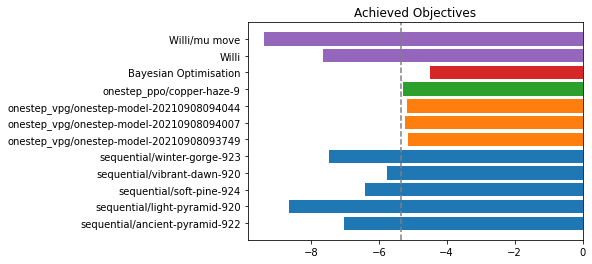

In [9]:
plt.title("Achieved Objectives")
types = [model.split("/")[0] for model in models]
colors = {
    "sequential": "#1f77b4",
    "onestep_vpg": "#ff7f0e",
    "onestep_ppo": "#2ca02c",
    "Bayesian Optimisation": "#d62728",
    "Willi": "#9467bd"
}
typecolors = [colors[t] for t in types]
plt.axvline(np.mean(initials), color="grey", ls="--")
plt.barh(models, objectives, color=typecolors)
plt.show()

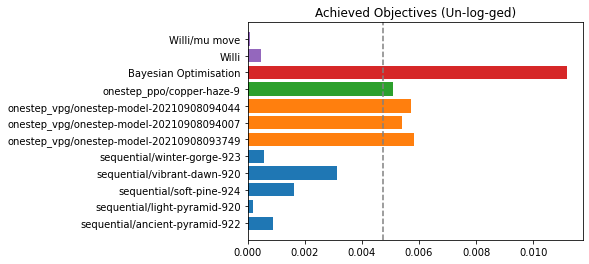

In [10]:
plt.title("Achieved Objectives (Un-log-ged)")

typecolors = [colors[t] for t in types]
unlogged = [np.exp(objective) for objective in objectives]
plt.axvline(np.exp(np.mean(initials)), color="grey", ls="--")
plt.barh(models, unlogged, color=typecolors)
plt.show()

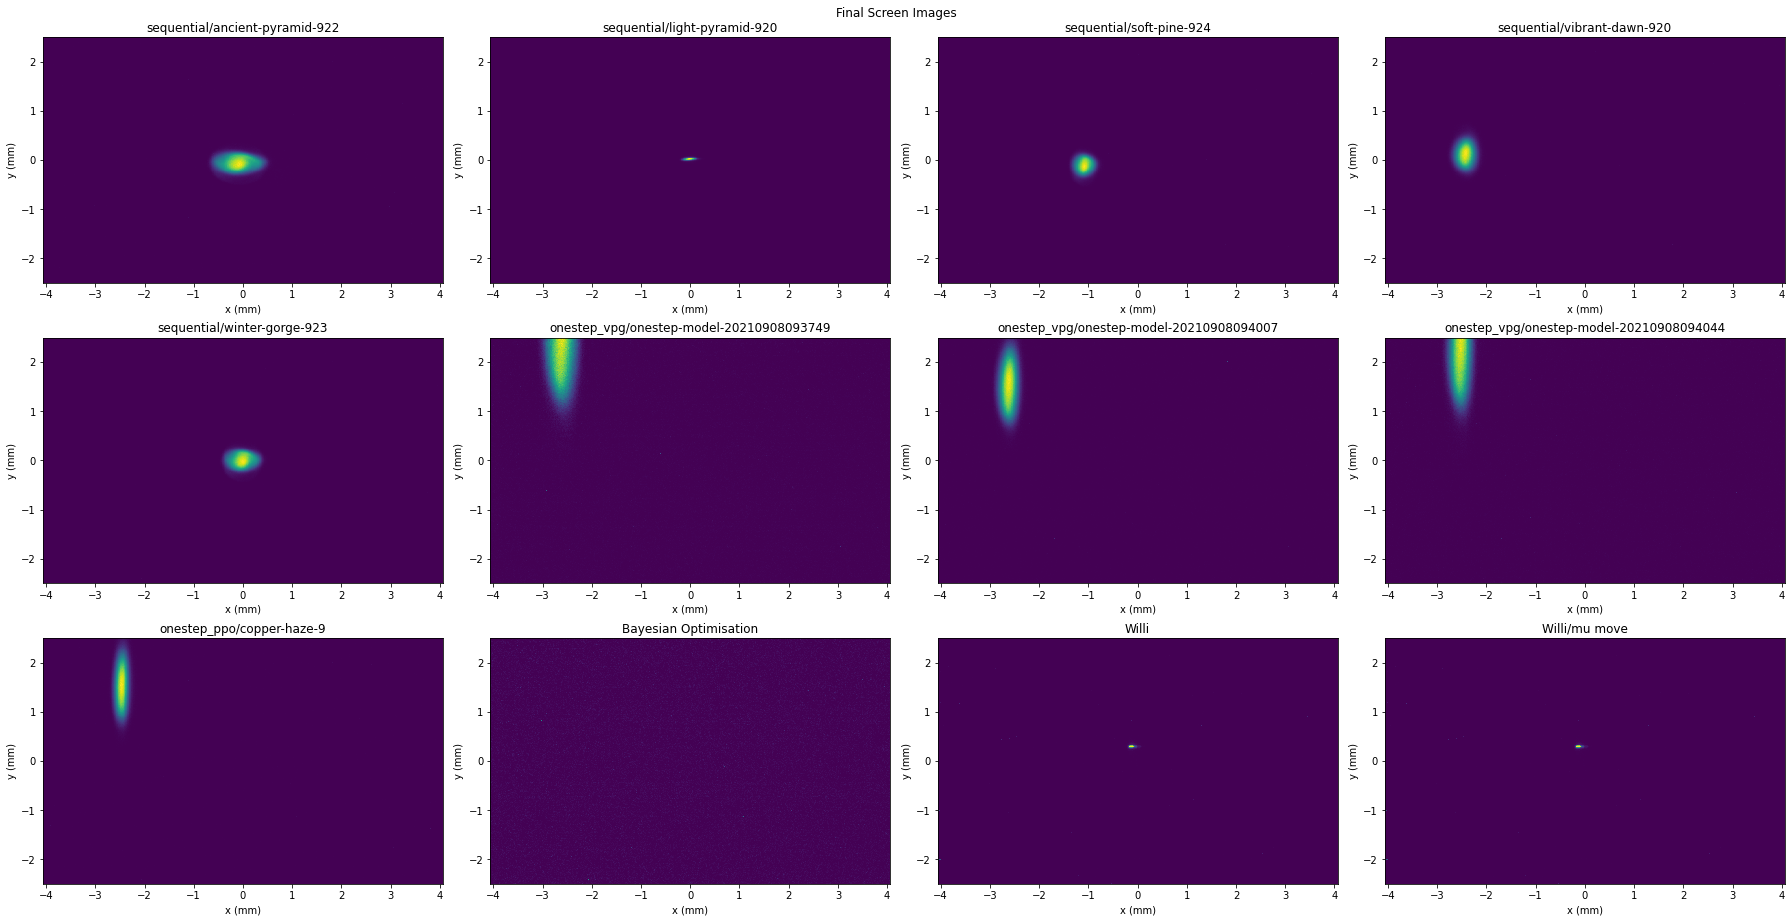

In [11]:
plt.figure(figsize=(25,13))
plt.suptitle("Final Screen Images")
for i, (name, img) in enumerate(zip(models, final_beams)):
    plt.subplot(3, 4, i+1%4)
    plt.title(name)
    resolution = (2448, 2040)
    pixel_size = (3.3198e-6, 2.4469e-6)
    extent = (-resolution[0] * pixel_size[0] / 2 * 1e3, resolution[0] * pixel_size[0] / 2 * 1e3,
              -resolution[1] * pixel_size[1] / 2 * 1e3, resolution[1] * pixel_size[1] / 2 * 1e3)
    plt.imshow(img, interpolation="None", extent=extent)
    plt.xlabel("x (mm)")
    plt.ylabel("y (mm)")
plt.tight_layout()
plt.show()

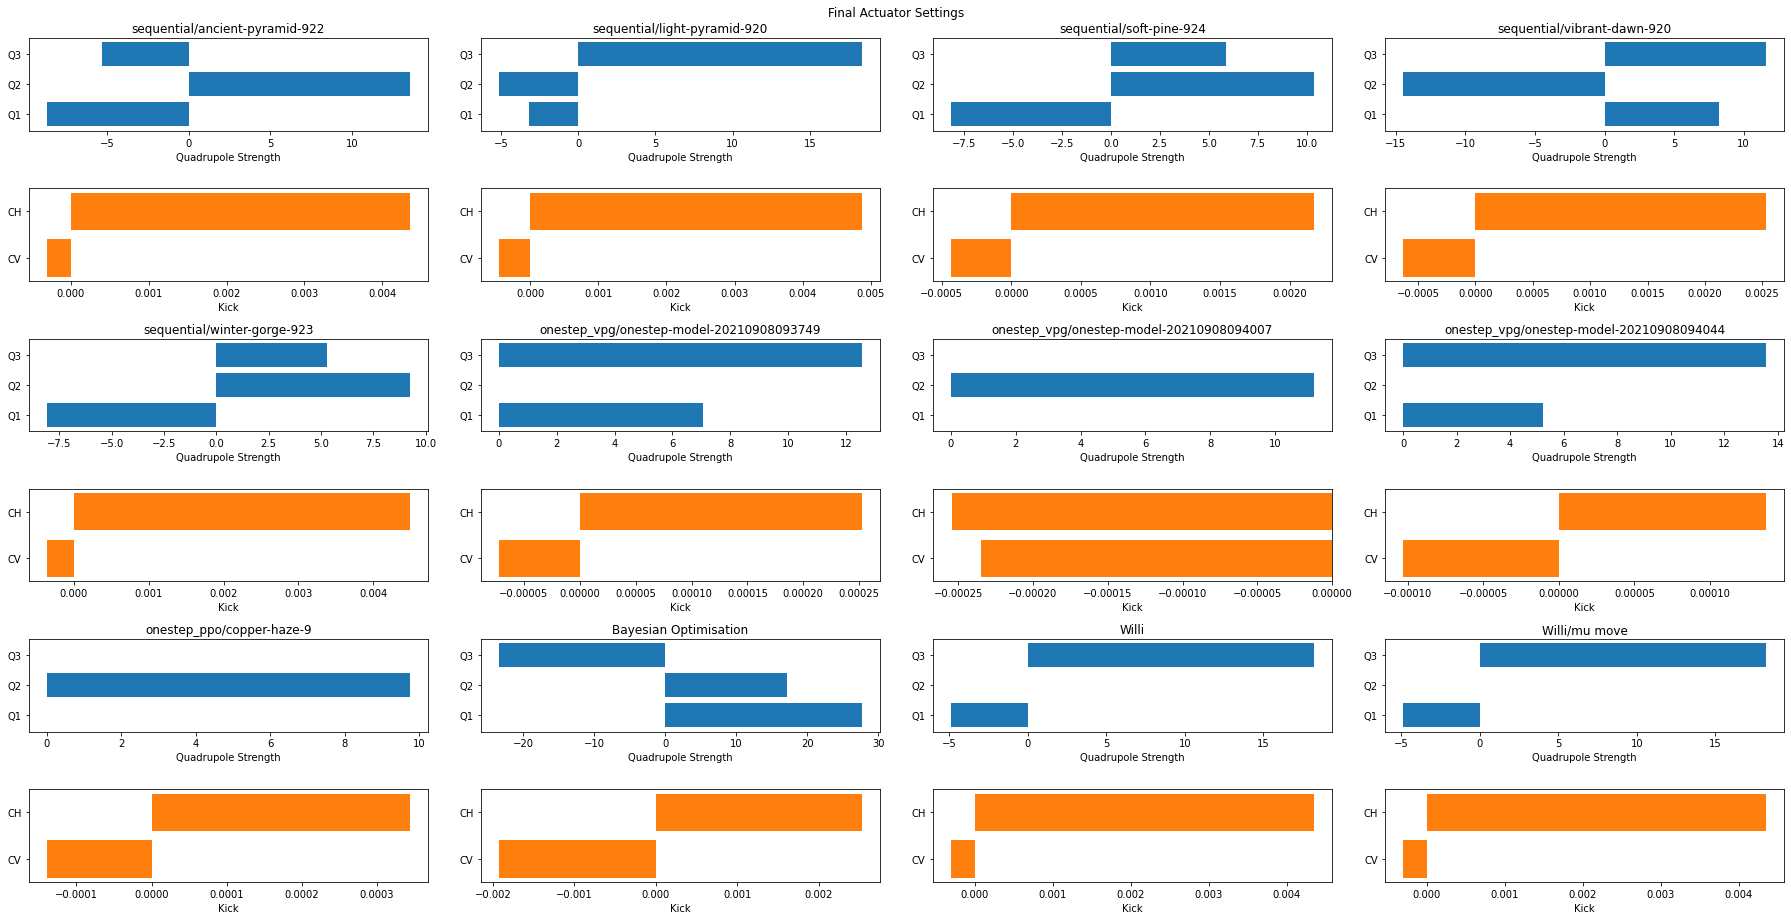

In [12]:
plt.figure(figsize=(25,13))
plt.suptitle("Final Actuator Settings")
for i, (name, actuator) in enumerate(zip(models, final_actuators)):
    plt.subplot(6, 4, (i+1%4)+4*int(i/4))
    plt.title(name)
    plt.barh(["Q1","Q2","Q3"], actuator[:3], color="#1f77b4")
    plt.xlabel("Quadrupole Strength")
    plt.subplot(6, 4, 4+(i+1%4)+4*int(i/4))
    plt.barh(["CV","CH"], actuator[3:], color="#ff7f0e")
    plt.xlabel("Kick")
plt.tight_layout()
plt.show()

## Sequential Paths Taken (First Try)

In [26]:
def plot_objective(objective):
    plt.title("Objective")
    plt.plot(objective)
    plt.xlabel("Step")
    plt.ylabel("Objective")
    plt.grid()

def plot_beam_parameters(achieveds, desireds):
    plt.title("Beam Parameters")
    plt.plot(achieveds[:,0] * 1e3, label="mu_x", c="red")
    plt.plot(achieveds[:,1] * 1e3, label="mu_y", c="green")
    plt.plot(achieveds[:,2] * 1e3, label="sigma_x", c="blue")
    plt.plot(achieveds[:,3] * 1e3, label="sigma_y", c="orange")
    plt.plot(desireds[:,0] * 1e3, label="mu_x'", ls="--", c="red")
    plt.plot(desireds[:,1] * 1e3, label="mu_y'", ls="--", c="green")
    plt.plot(desireds[:,2] * 1e3, label="sigma_x'", ls="--", c="blue")
    plt.plot(desireds[:,3] * 1e3, label="sigma_y'", ls="--", c="orange")
    plt.xlabel("Step")
    plt.ylabel("Paramter Value (mm)")
    plt.grid()
    plt.legend()

def plot_trajectory(achieveds, desireds, pixel_size, screen_resolution):
    plt.title("mu Trajectory")
    plt.plot(achieveds[:,0] * 1e3, achieveds[:,1] * 1e3, marker="X", c="green", label="achieved mu")
    plt.plot(desireds[0,0] * 1e3, desireds[0,1] * 1e3, marker=r"$\heartsuit$", c="red", markersize=12, label="desired mu")
    plt.xlim(-pixel_size[0] * screen_resolution[0] / 2 * 1e3, pixel_size[0] * screen_resolution[0] / 2 * 1e3)
    plt.ylim(-pixel_size[1] * screen_resolution[1] / 2 * 1e3, pixel_size[1] * screen_resolution[1] / 2 * 1e3)
    plt.xlabel("x (mm)")
    plt.ylabel("y (mm)")
    plt.grid()
    plt.legend()

def plot_quadrupoles(actuators):
    plt.plot(actuators[:,0], label="Q1")
    plt.plot(actuators[:,1], label="Q2")
    plt.plot(actuators[:,2], label="Q3")
    plt.grid()
    plt.legend()

def plot_steerers(actuators):
    plt.plot(actuators[:,3], label="CV")
    plt.plot(actuators[:,4], label="CH")
    plt.grid()
    plt.legend()

Column 1: sequential/ancient-pyramid-922
Column 2: sequential/light-pyramid-920
Column 3: sequential/soft-pine-924
Column 4: sequential/vibrant-dawn-920
Column 5: sequential/winter-gorge-923


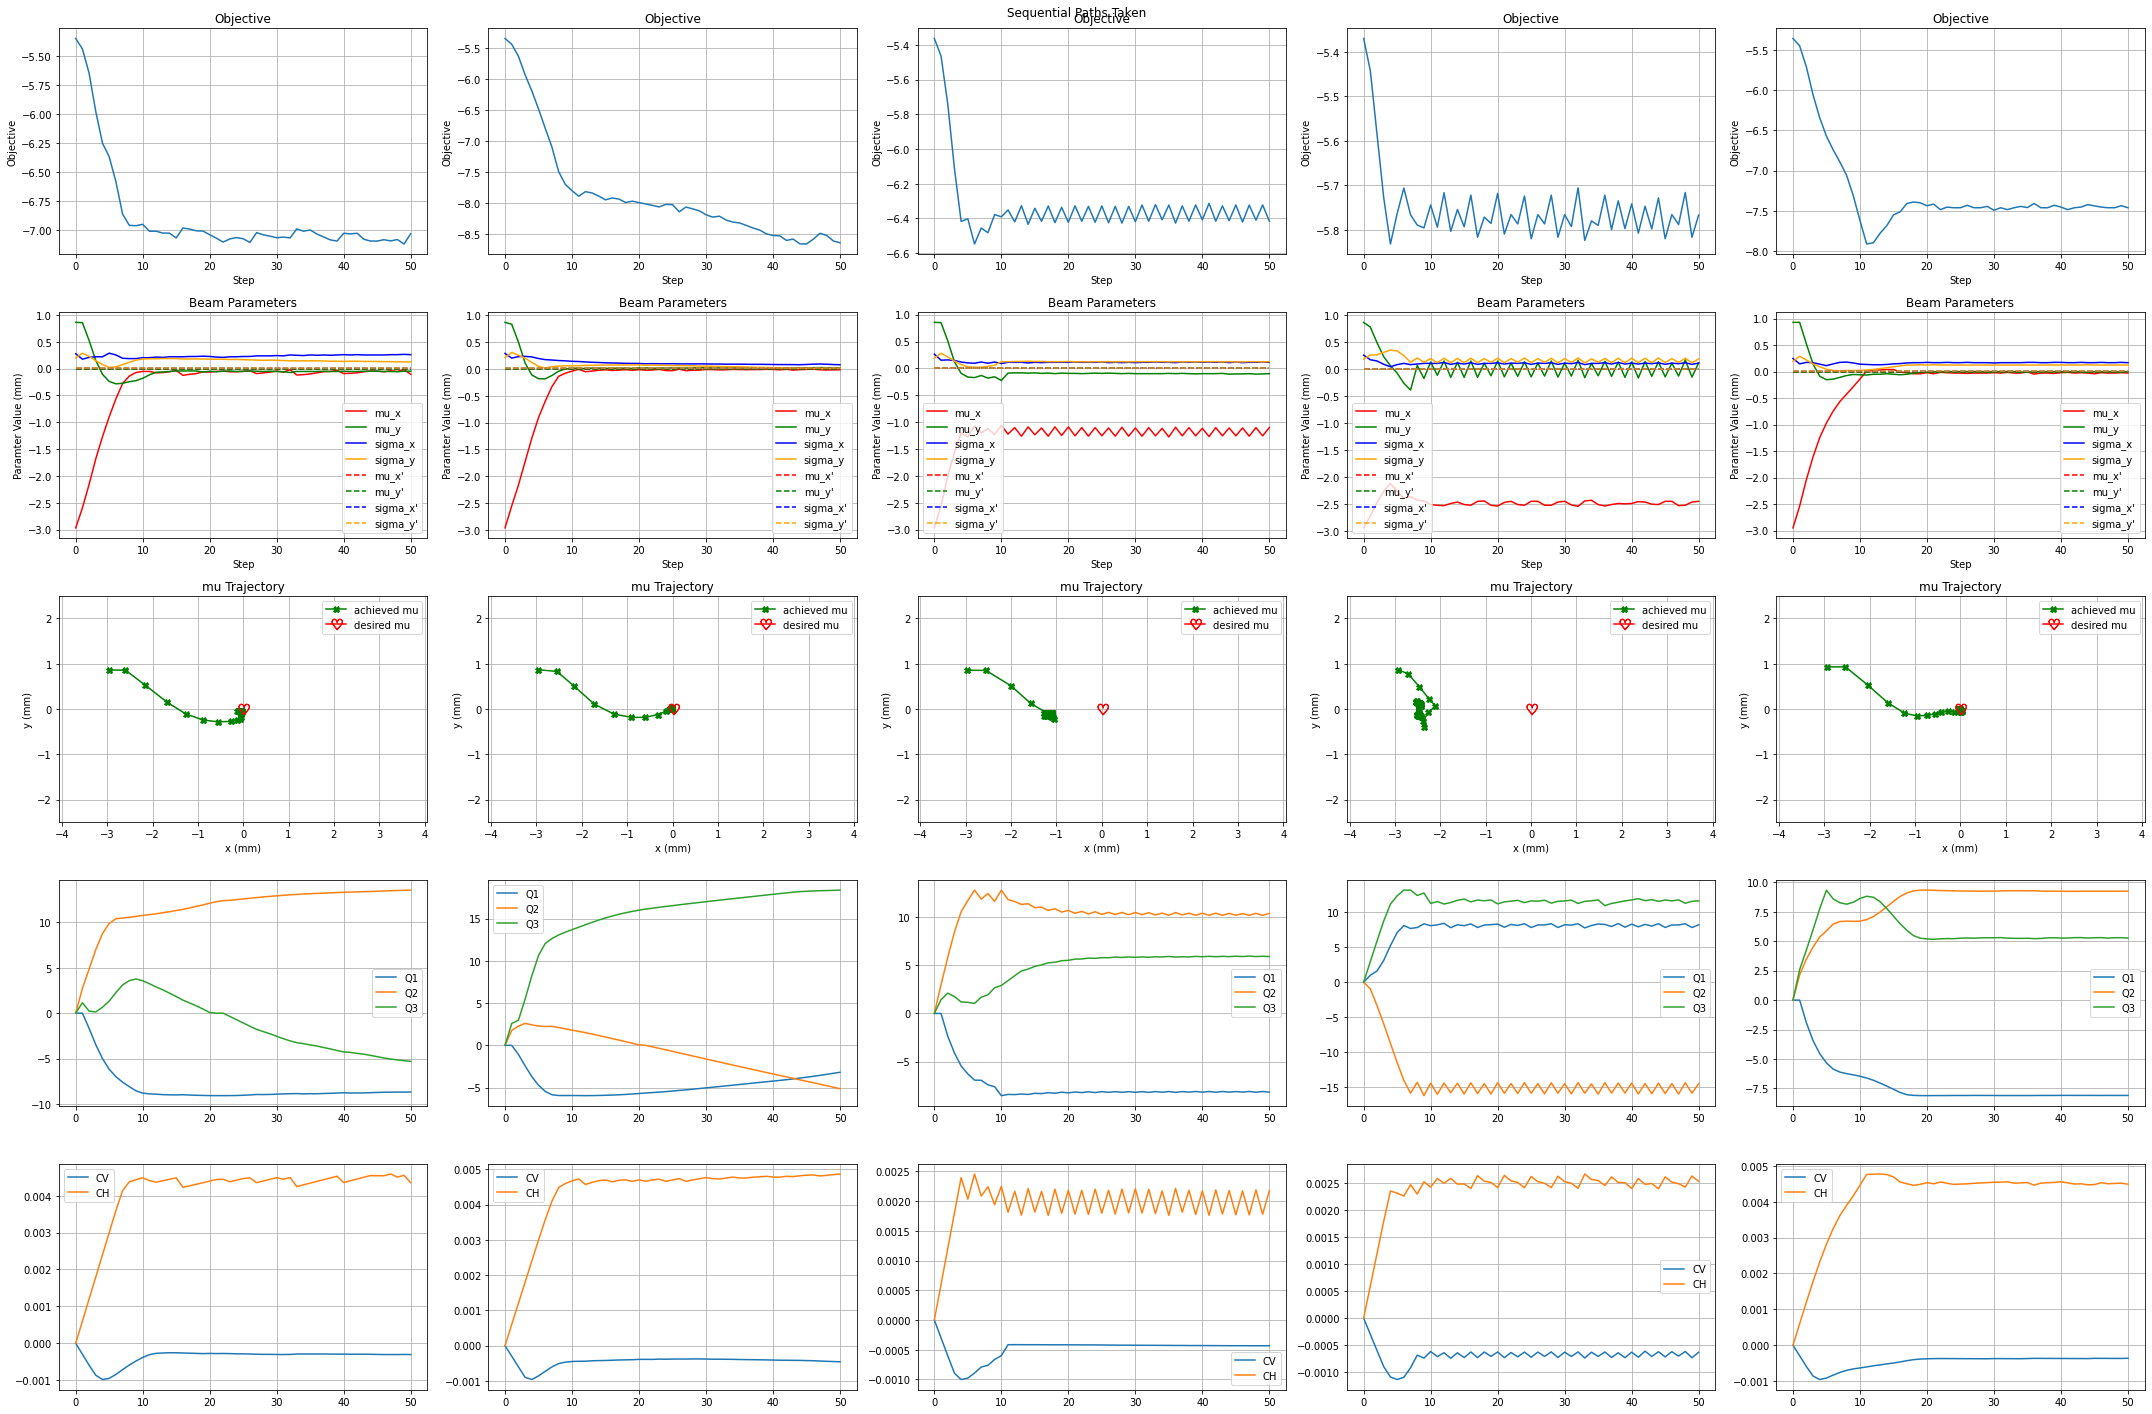

In [32]:
names = [
    "20210930142130_gross_incoming",
    "20210930145746_seq_agent_002_rebinned",
    "20210930152651_soft_pine_first_try",
    "20210930153503_vibrant_dawn_first_try",
    "20210930154332_winter_gorge_first_try"
]

plt.figure(figsize=(30,20))
plt.suptitle("Sequential Paths Taken")
for i, name in enumerate(names):
    with open(f"experiments/{name}/log.pkl", "rb") as f:
        data = pickle.load(f)
    
    print(f"Column {i+1}: {data['model_name']}")
    
    plt.subplot(5, len(names), i+1+0*len(names))
    objective = [sample["objective"] for sample in data["history"]]
    plot_objective(objective)
    
    achieveds = np.array([sample["observation"]["achieved_goal"] for sample in data["history"]])
    desireds = np.array([sample["observation"]["desired_goal"] for sample in data["history"]])
    plt.subplot(5, len(names), i+1+1*len(names))
    plot_beam_parameters(achieveds, desireds)
    plt.subplot(5, len(names), i+1+2*len(names))
    plot_trajectory(achieveds, desireds, (3.3198e-6,2.4469e-6), (2448,2040))
    
    actuators = np.array([sample["observation"]["observation"] for sample in data["history"]])
    plt.subplot(5, len(names), i+1+3*len(names))
    plot_quadrupoles(actuators)
    plt.subplot(5, len(names), i+1+4*len(names))
    plot_steerers(actuators)
plt.tight_layout()
plt.show()

## Onestep Result Development (First Try)

In [34]:
def objective_fn(achieved, desired):
    offset = achieved - desired
    weights = np.array([1, 1, 2, 2])
    return np.log((weights * np.abs(offset)).sum())

Column 1: onestep_vpg/onestep-model-20210908093749
Column 2: onestep_vpg/onestep-model-20210908094007
Column 3: onestep_vpg/onestep-model-20210908094044
Column 4: onestep_ppo/copper-haze-9


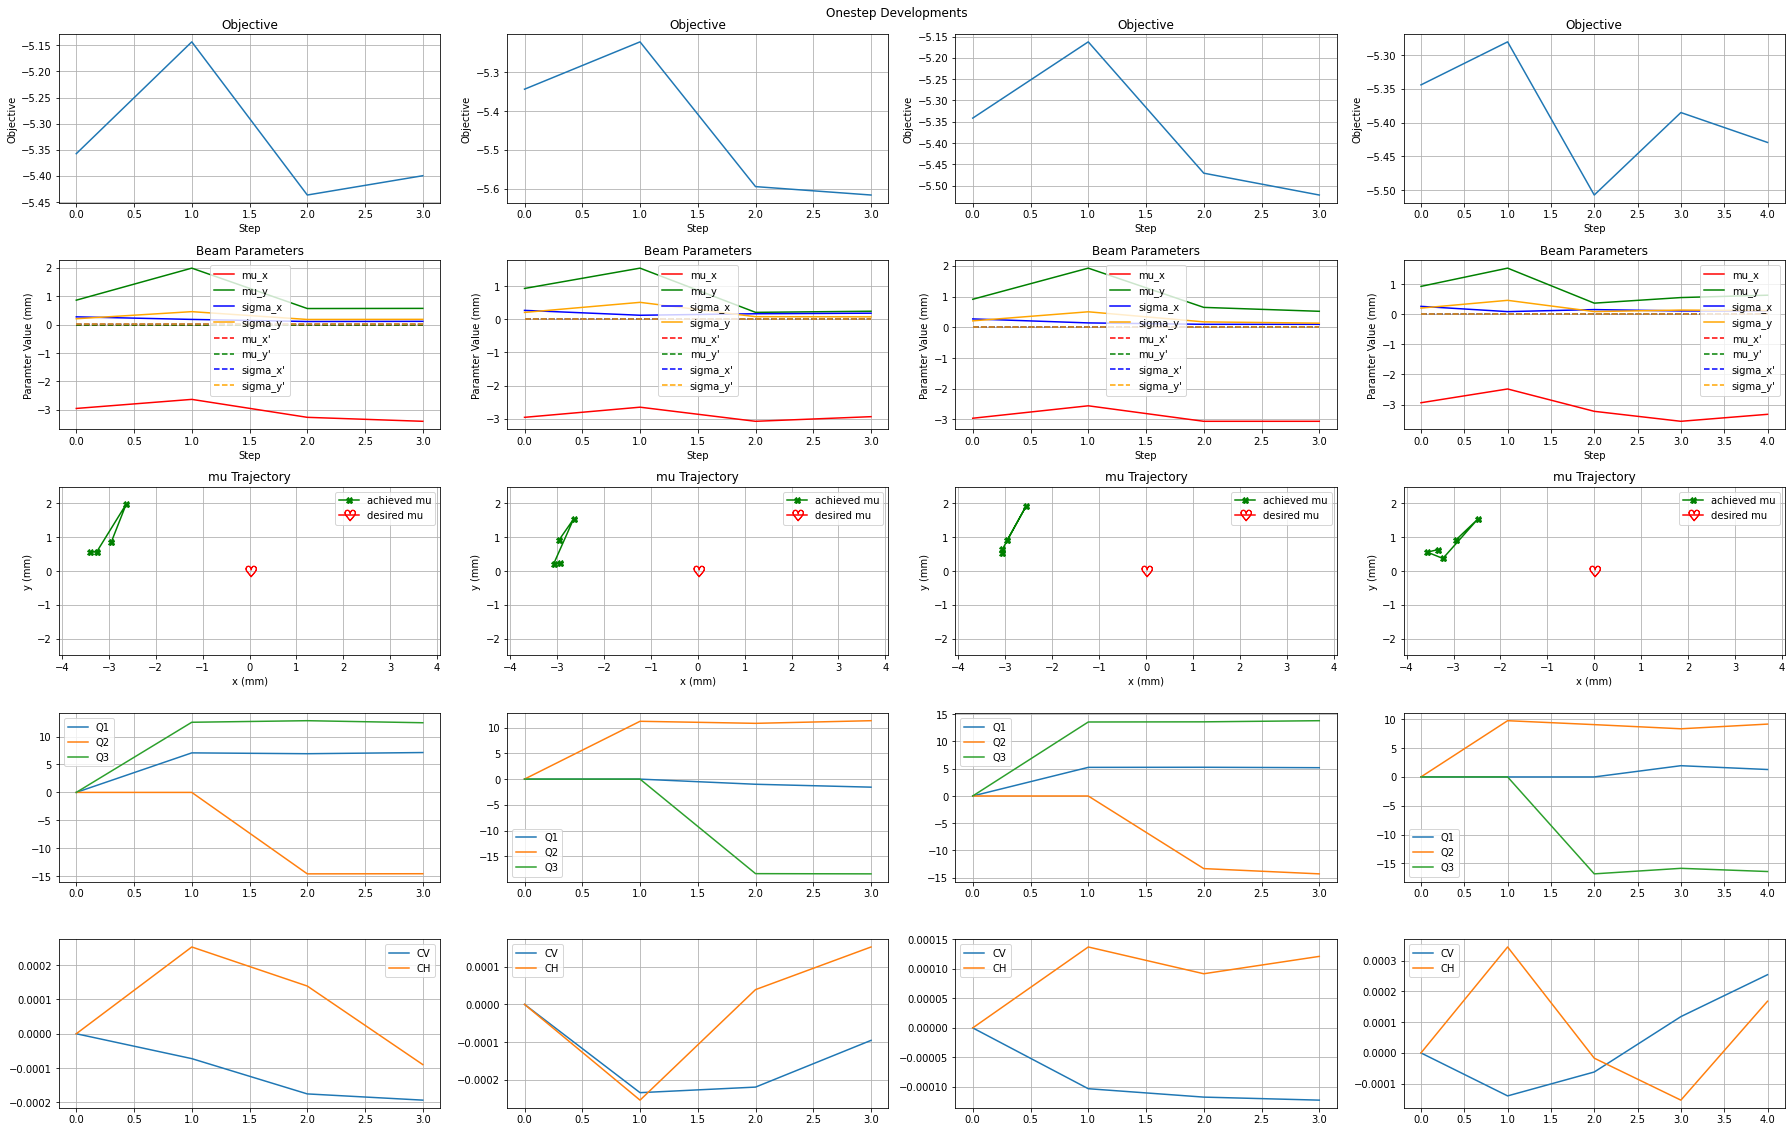

In [43]:
agents = [
    [
        "20210930155202_onestep001_firsttry",
        "20210930155235_onestep001_firsttry",
        "20210930155329_onestep001_firsttry"
    ], [
        "20210930155423_onestep002_firsttry",
        "20210930155550_onestep002_firsttry",
        "20210930155651_onestep002_firsttry"
    ], [
        "20210930155830_onesteo003_firsttry",
        "20210930155901_onesteo003_firsttry",
        "20210930155928_onesteo003_firsttry"
    ], [
        "20210930160027_ppo001_firsttry",
        "20210930160103_ppo001_firsttry",
        "20210930160211_ppo001_firsttry",
        "20210930160231_ppo001_firsttry"
    ]
]

plt.figure(figsize=(25,16))
plt.suptitle("Onestep Developments")
for i, names in enumerate(agents):
    name = names[0]
    with open(f"experiments/{name}/log.pkl", "rb") as f:
        data = pickle.load(f)
    objective = [objective_fn(data["initial_achieved"], data["desired"])]
    achieveds = [data["initial_achieved"]]
    desireds = [data["desired"]]
    actuators = [data["initial_actuators"]]
    
    for name in names:
        with open(f"experiments/{name}/log.pkl", "rb") as f:
            data = pickle.load(f)
        
        objective.append(objective_fn(data["final_achieved"], data["desired"]))
        achieveds.append(data["final_achieved"])
        desireds.append(data["desired"])
        actuators.append(data["final_actuators"])
    
    objective = np.array(objective)
    achieveds = np.array(achieveds)
    desireds = np.array(desireds)
    actuators = np.array(actuators)
    
    print(f"Column {i+1}: {data['model_name']}")
    
    plt.subplot(5, len(agents), i+1+0*len(agents))
    plot_objective(objective)
    
    plt.subplot(5, len(agents), i+1+1*len(agents))
    plot_beam_parameters(achieveds, desireds)
    plt.subplot(5, len(agents), i+1+2*len(agents))
    plot_trajectory(achieveds, desireds, (3.3198e-6,2.4469e-6), (2448,2040))
    
    plt.subplot(5, len(agents), i+1+3*len(agents))
    plot_quadrupoles(actuators)
    plt.subplot(5, len(agents), i+1+4*len(agents))
    plot_steerers(actuators)
plt.tight_layout()
plt.show()

## Repeatability (Light Pyramid)

Column 1: sequential/light-pyramid-920
Column 2: sequential/light-pyramid-920


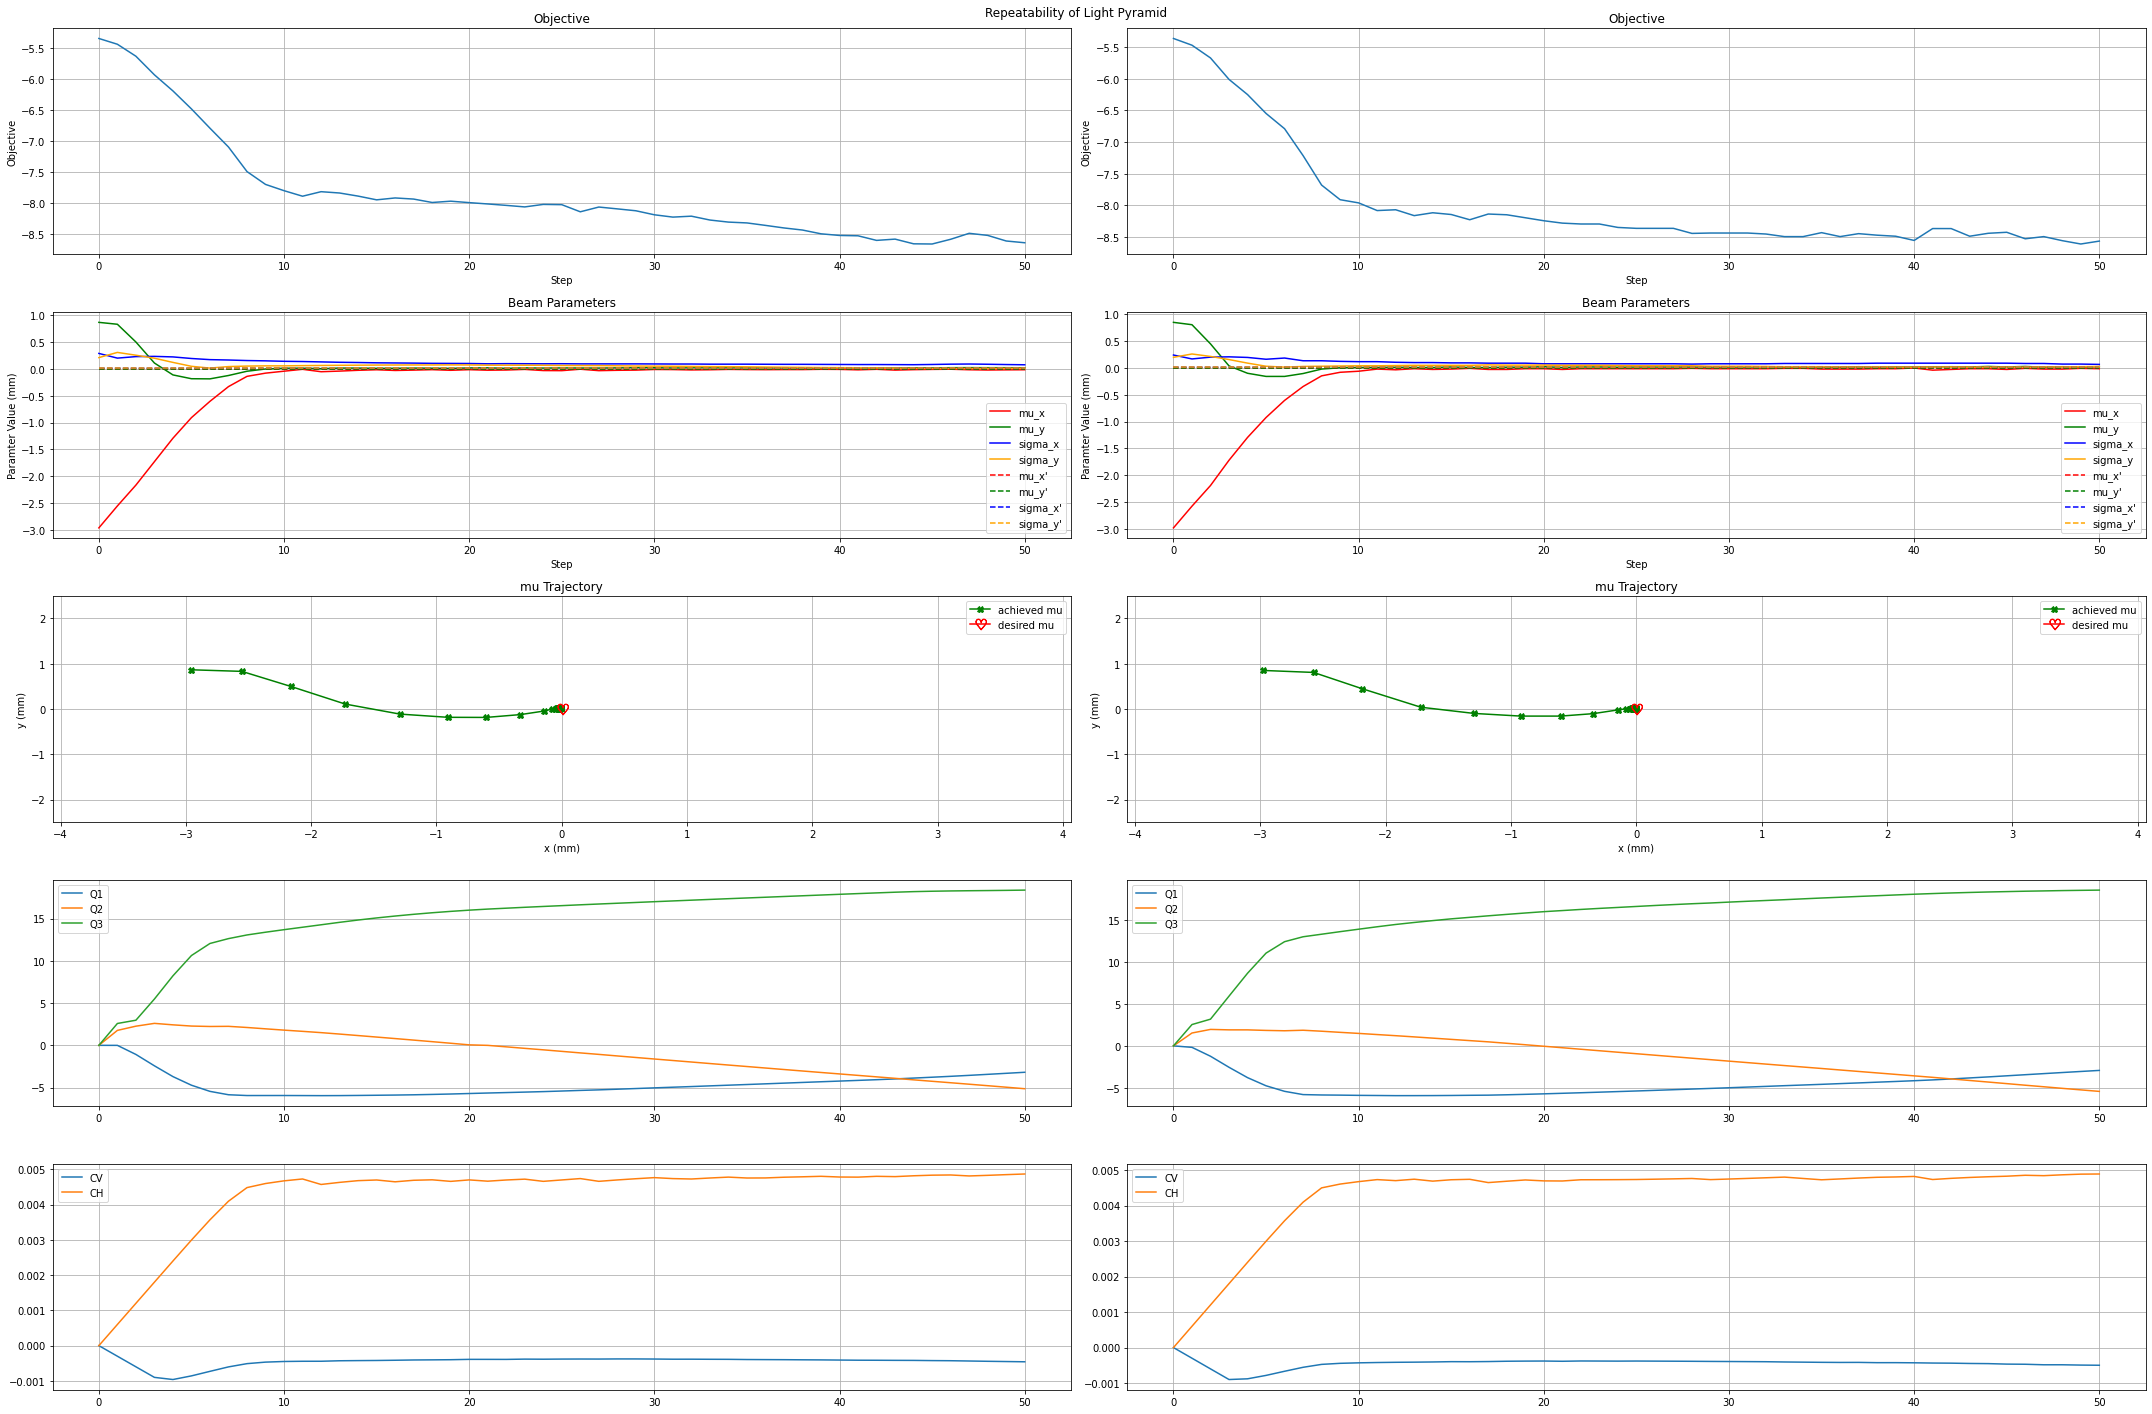

In [46]:
names = [
    "20210930145746_seq_agent_002_rebinned",
    "20210930163627_lightpyramid_firsttryrepeat"
]

plt.figure(figsize=(30,20))
plt.suptitle("Repeatability of Light Pyramid")
for i, name in enumerate(names):
    with open(f"experiments/{name}/log.pkl", "rb") as f:
        data = pickle.load(f)
    
    print(f"Column {i+1}: {data['model_name']}")
    
    plt.subplot(5, len(names), i+1+0*len(names))
    objective = [sample["objective"] for sample in data["history"]]
    plot_objective(objective)
    
    achieveds = np.array([sample["observation"]["achieved_goal"] for sample in data["history"]])
    desireds = np.array([sample["observation"]["desired_goal"] for sample in data["history"]])
    plt.subplot(5, len(names), i+1+1*len(names))
    plot_beam_parameters(achieveds, desireds)
    plt.subplot(5, len(names), i+1+2*len(names))
    plot_trajectory(achieveds, desireds, (3.3198e-6,2.4469e-6), (2448,2040))
    
    actuators = np.array([sample["observation"]["observation"] for sample in data["history"]])
    plt.subplot(5, len(names), i+1+3*len(names))
    plot_quadrupoles(actuators)
    plt.subplot(5, len(names), i+1+4*len(names))
    plot_steerers(actuators)
plt.tight_layout()
plt.show()

## Different Target (Light Pyramid and Ancient Pyramid)

Column 1: sequential/ancient-pyramid-922
Column 2: sequential/ancient-pyramid-922
Column 3: sequential/light-pyramid-920
Column 4: sequential/light-pyramid-920


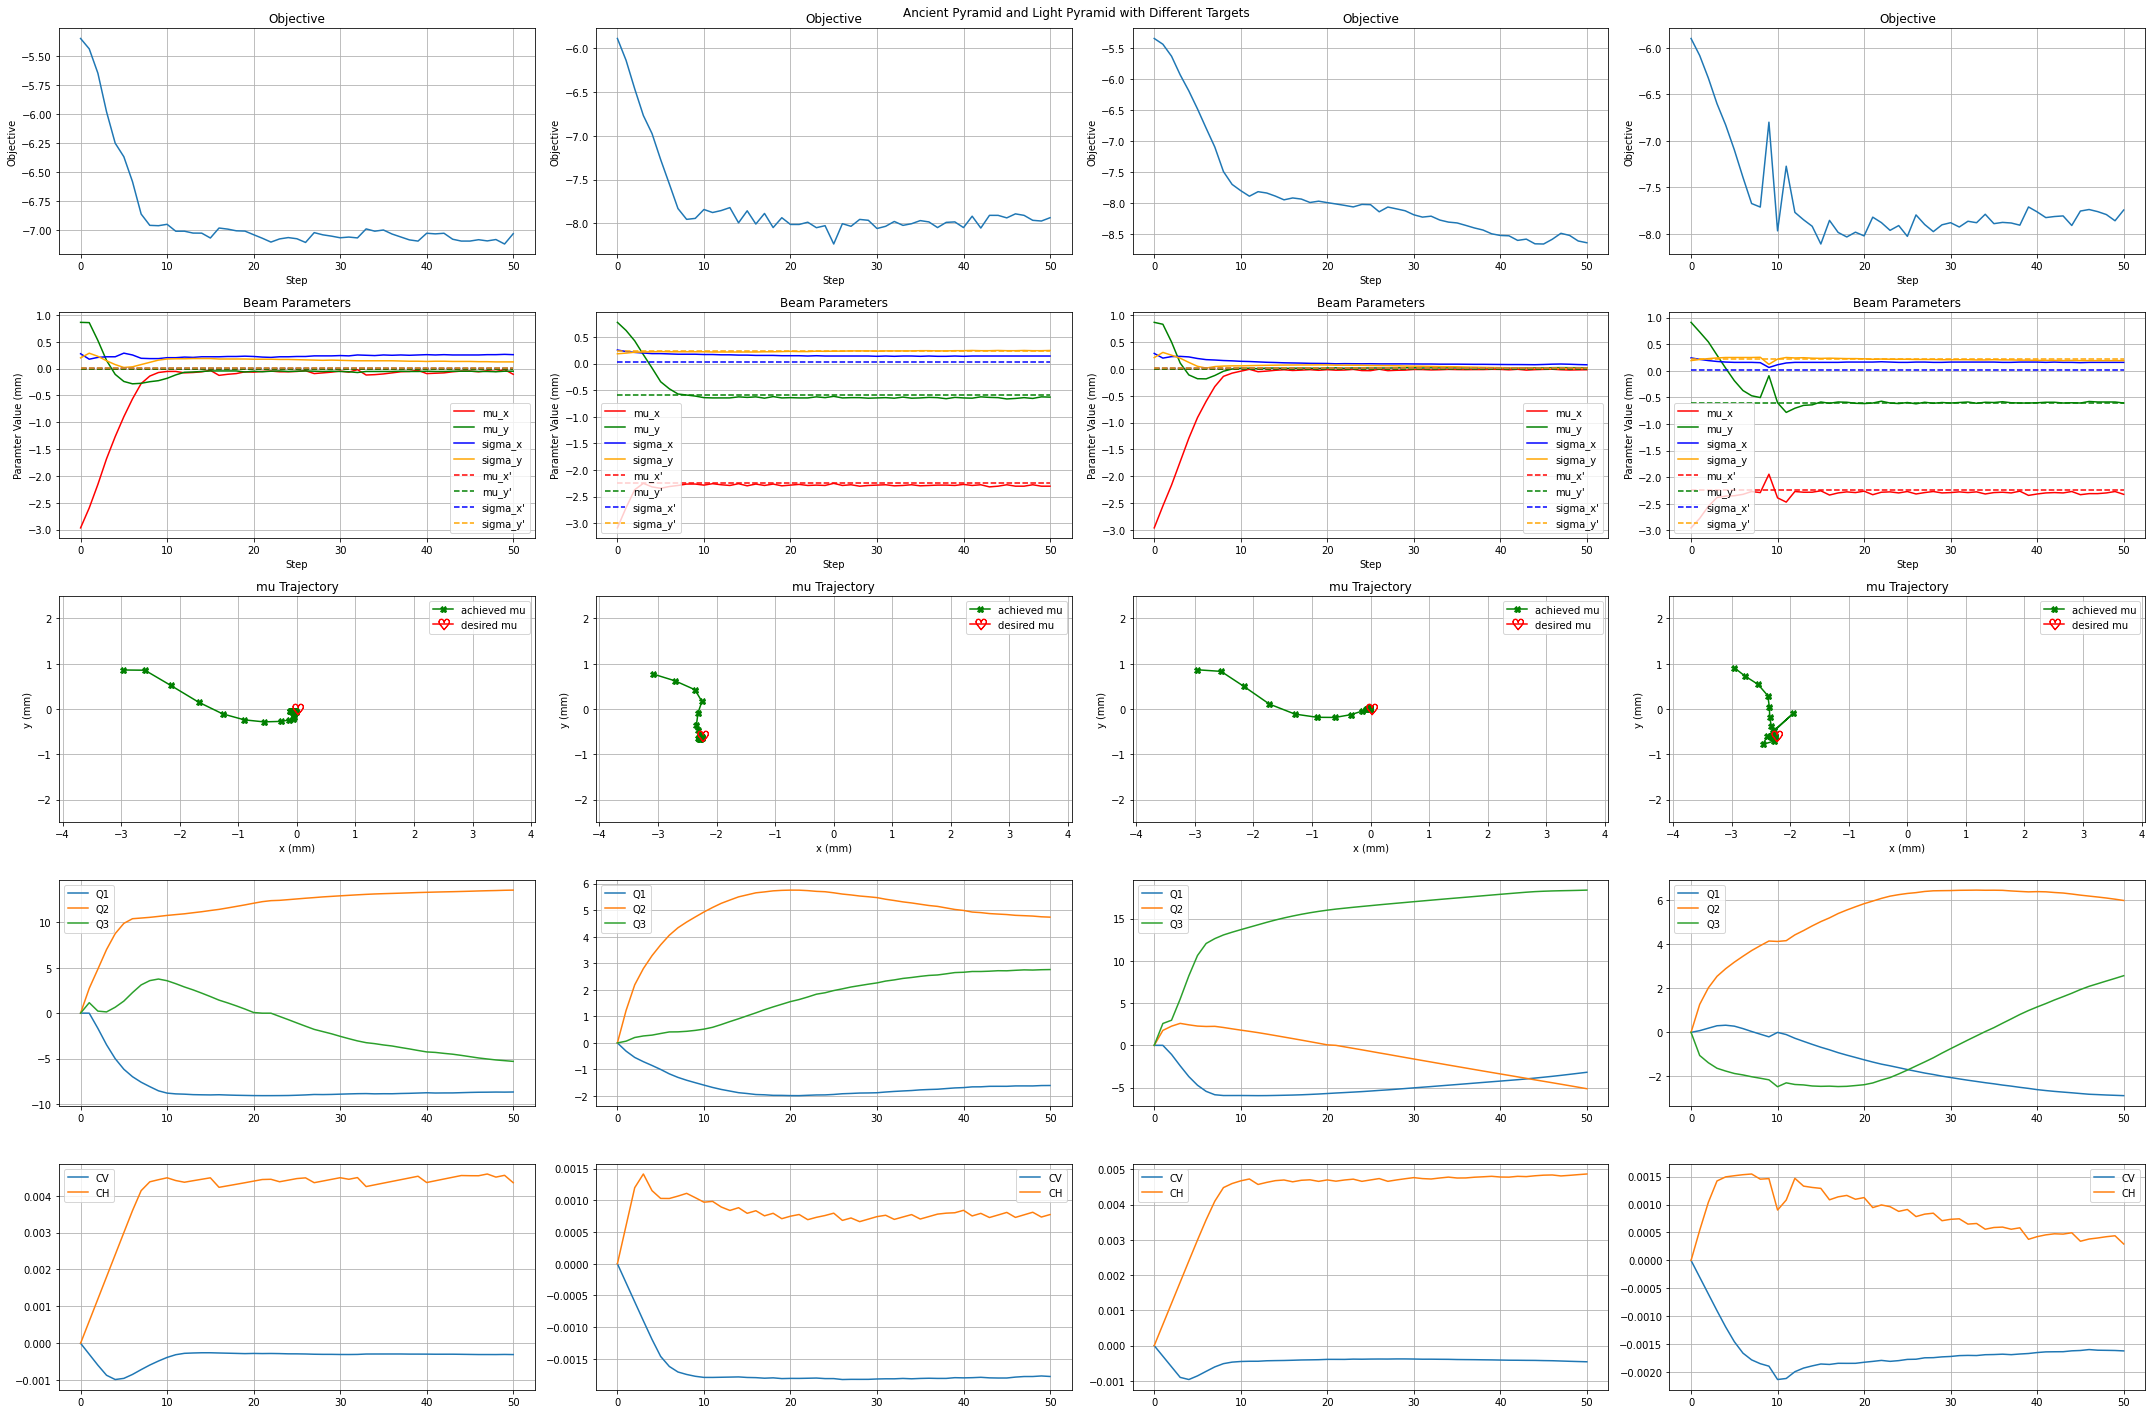

In [49]:
names = [
    "20210930142130_gross_incoming",
    "20210930171733_ancientpyramid_different_target_left",
    "20210930145746_seq_agent_002_rebinned",
    "20210930165951_lightpyramid_different_target_left"
]

plt.figure(figsize=(30,20))
plt.suptitle("Ancient Pyramid and Light Pyramid with Different Targets")
for i, name in enumerate(names):
    with open(f"experiments/{name}/log.pkl", "rb") as f:
        data = pickle.load(f)
    
    print(f"Column {i+1}: {data['model_name']}")
    
    plt.subplot(5, len(names), i+1+0*len(names))
    objective = [sample["objective"] for sample in data["history"]]
    plot_objective(objective)
    
    achieveds = np.array([sample["observation"]["achieved_goal"] for sample in data["history"]])
    desireds = np.array([sample["observation"]["desired_goal"] for sample in data["history"]])
    plt.subplot(5, len(names), i+1+1*len(names))
    plot_beam_parameters(achieveds, desireds)
    plt.subplot(5, len(names), i+1+2*len(names))
    plot_trajectory(achieveds, desireds, (3.3198e-6,2.4469e-6), (2448,2040))
    
    actuators = np.array([sample["observation"]["observation"] for sample in data["history"]])
    plt.subplot(5, len(names), i+1+3*len(names))
    plot_quadrupoles(actuators)
    plt.subplot(5, len(names), i+1+4*len(names))
    plot_steerers(actuators)
plt.tight_layout()
plt.show()

## Different Incoming

Column 1: sequential/light-pyramid-920
Column 2: sequential/light-pyramid-920


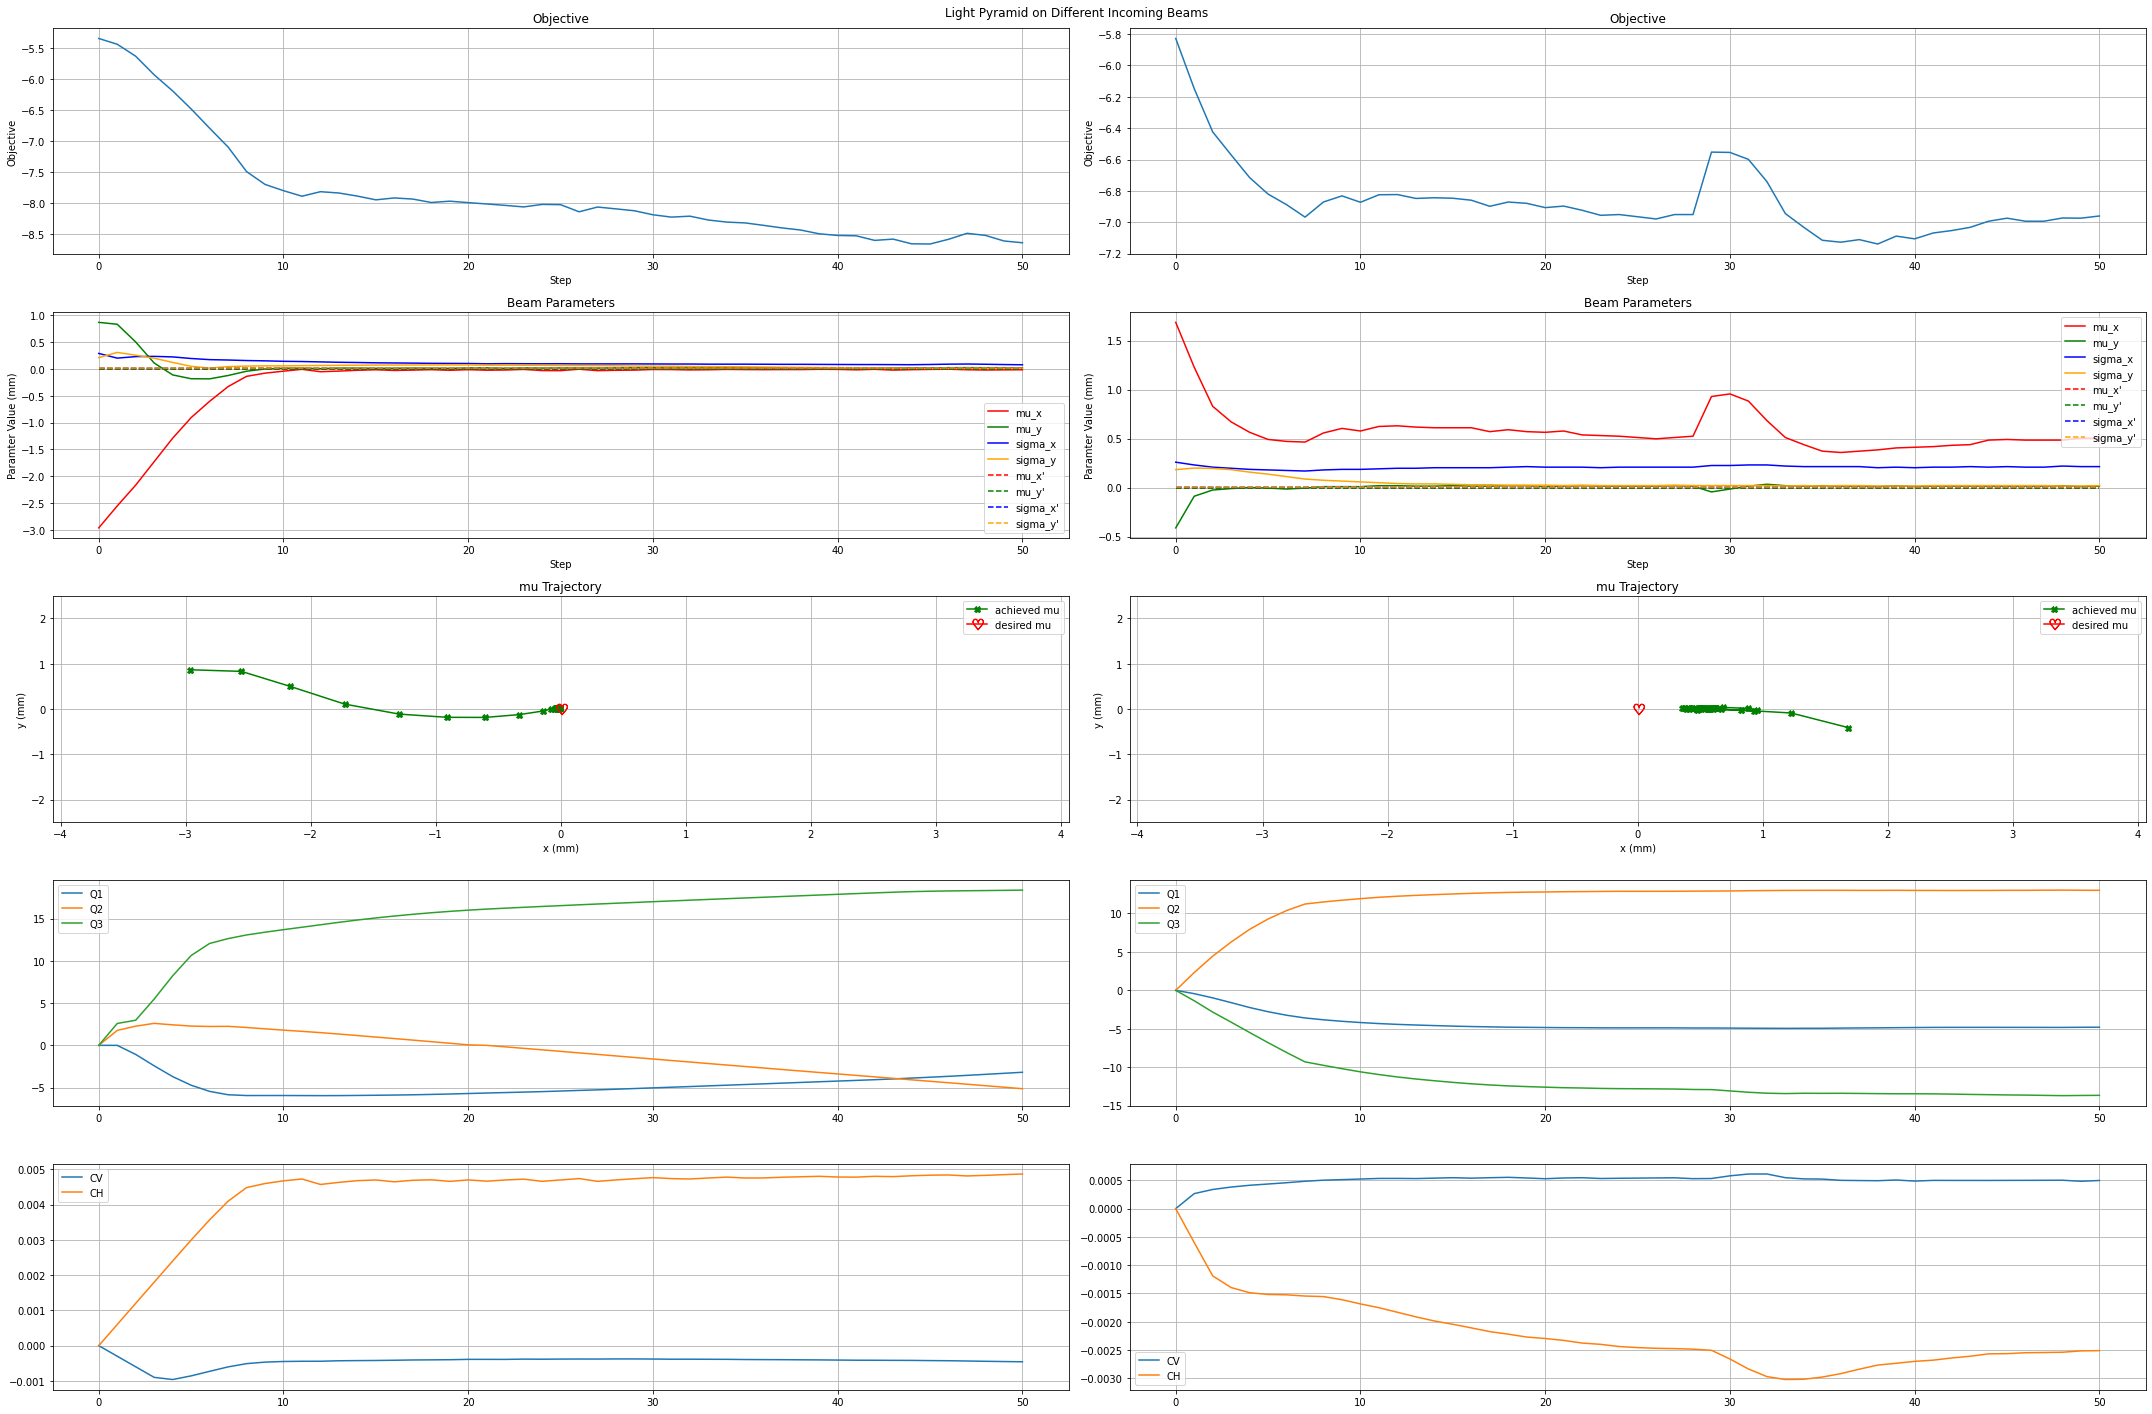

In [50]:
names = [
    "20210930145746_seq_agent_002_rebinned",
    "20210930174516_different_incoming_light_pyramid"
]

plt.figure(figsize=(30,20))
plt.suptitle("Light Pyramid on Different Incoming Beams")
for i, name in enumerate(names):
    with open(f"experiments/{name}/log.pkl", "rb") as f:
        data = pickle.load(f)
    
    print(f"Column {i+1}: {data['model_name']}")
    
    plt.subplot(5, len(names), i+1+0*len(names))
    objective = [sample["objective"] for sample in data["history"]]
    plot_objective(objective)
    
    achieveds = np.array([sample["observation"]["achieved_goal"] for sample in data["history"]])
    desireds = np.array([sample["observation"]["desired_goal"] for sample in data["history"]])
    plt.subplot(5, len(names), i+1+1*len(names))
    plot_beam_parameters(achieveds, desireds)
    plt.subplot(5, len(names), i+1+2*len(names))
    plot_trajectory(achieveds, desireds, (3.3198e-6,2.4469e-6), (2448,2040))
    
    actuators = np.array([sample["observation"]["observation"] for sample in data["history"]])
    plt.subplot(5, len(names), i+1+3*len(names))
    plot_quadrupoles(actuators)
    plt.subplot(5, len(names), i+1+4*len(names))
    plot_steerers(actuators)
plt.tight_layout()
plt.show()